# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
from transformers import TrainingArguments

import utility.ModelConfig as mc

import sqlite3

import utility.utility as util

# resets import once changes have been applied
%load_ext autoreload
%autoreload 2

# Load ModelConfig

In [2]:
"""
path to local
"""
path_cwd = os.getcwd()

"""
name of modelconfig file
"""
_name_config_file = "ModelConfig_roberta-base_English_ConsUncons_07_02_24_23_52.pkl"

"""
path to file with modelconfig
"""
path_file_modelconfig = os.path.join("modelconfigs", _name_config_file)

In [3]:
model_config = None
with open(os.path.join(path_cwd, path_file_modelconfig), "rb") as f:
    model_config = pickle.load(f)

# ModelConfig

In [4]:
model_config.base_model

'roberta-base'

In [5]:
model_config.timestamp_initial

'07_02_24_23_52'

In [6]:
model_config.task

'Binary Classification _ with study object and hps log history'

In [7]:
model_config.loss_fct

'ce'

In [8]:
model_config.from_hub

True

In [9]:
model_config.dataset_name_hub

'HalaJada/FinStmts_ConsUncons_Sliding_English_SeqClass'

In [10]:
model_config.dataset_name_local

''

In [11]:
model_config.path_dataset_local

'datasets/'

In [12]:
model_config.num_labels

2

In [13]:
model_config.weight_scheme

'rev_prop'

In [14]:
model_config.class_weights

[2.170212765957447, 1.8545454545454547]

In [15]:
model_config.eval_metrics

['accuracy', 'precision', 'recall', 'f1', 'matthews_correlation']

In [16]:
model_config.metric_best_model

'eval_matthews_correlation'

In [17]:
model_config.no_trials

4

In [18]:
model_config.frozen

'unfrozen'

In [19]:
model_config.best_run

BestRun(run_id='3', objective=0.8427250396334782, hyperparameters={'learning_rate': 1.7271482785239705e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.014332091054584207, 'warmup_ratio': 0.0024918166633538965}, run_summary=None)

In [20]:
model_config.path_initial_training

'training_data/roberta-base/initial_training_07_02_24_23_52'

In [21]:
model_config.flag_mv

True

In [22]:
model_config.hps_log_df

,loss,learning_rate,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_matthews_correlation,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step,trial_no
0,0.3851,3.179255e-05,0.269523,0.911398,0.897071,0.945326,0.920567,0.822000,23.0250,90.684,11.336,1.0,1224,1
1,0.2257,0.000000e+00,0.323429,0.921456,0.920277,0.936508,0.928322,0.841629,22.8528,91.367,11.421,2.0,2448,1
2,0.4116,1.853576e-06,0.287803,0.882184,0.905109,0.874780,0.889686,0.763862,23.1541,90.178,11.272,1.0,612,2
3,0.2127,9.267878e-07,0.240910,0.911877,0.904600,0.936508,0.920277,0.822459,22.9110,91.135,11.392,2.0,1224,2
4,0.1736,0.000000e+00,0.247190,0.914272,0.908469,0.936508,0.922275,0.827231,22.9041,91.163,11.395,3.0,1836,2
5,0.6348,5.525295e-05,0.693432,0.543103,0.543103,1.000000,0.703911,0.000000,24.5371,85.096,10.637,1.0,1224,3
6,0.6445,2.762647e-05,0.476926,0.827586,0.790977,0.927690,0.853896,0.659131,22.8954,91.197,11.400,2.0,2448,3
7,0.5162,0.000000e+00,0.496613,0.803161,0.821333,0.814815,0.818061,0.603694,22.5886,92.436,11.555,3.0,3672,3
8,0.3133,8.660506e-06,0.370929,0.914751,0.895041,0.955026,0.924061,0.829395,22.9718,90.894,11.362,1.0,1224,4
9,0.1512,0.000000e+00,0.415259,0.921935,0.915312,0.943563,0.929223,0.842725,23.2319,89.876,11.235,2.0,2448,4


In [23]:
model_config.study_name

'test'

In [24]:
model_config.path_study_db

'study_dbs/test_roberta-base_English_ConsUncons_07_02_24_23_52.db'

In [25]:
# Create a connection to the database
conn = sqlite3.connect(os.path.join(path_cwd, model_config.path_study_db))
# Create a cursor object
cursor = conn.cursor()
# Execute the command to list all tables
cursor.execute("SELECT * FROM trial_params")

# Fetch the results
tables = cursor.fetchall()
display(util.process_study_db_trial_params(tables))
conn.close()

,learning_rate,per_device_train_batch_size,num_train_epochs,weight_decay,warmup_ratio
0,0.000062,8,2.0,0.007934,0.030461
1,0.000003,16,3.0,0.001305,0.010496
2,0.000078,8,3.0,0.046147,0.062099
3,0.000017,8,2.0,0.014332,0.002492


In [26]:
model_config.timestamp_final

'08_02_24_02_02'

In [27]:
model_config.path_final_training

'training_data/roberta-base/final_training_08_02_24_02_02'

In [28]:
model_config.path_trained_model

'trained_models/roberta-base_08_02_24_02_02'

,loss,learning_rate,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_matthews_correlation,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
1,0.2949,0.000009,0.216898,0.938343,0.956204,0.929078,0.942446,0.876506,22.3264,92.984,11.645,1.0,1485
2,0.1360,0.000000,0.294569,0.941715,0.954013,0.937943,0.945910,0.882884,23.7887,87.268,10.930,2.0,2970


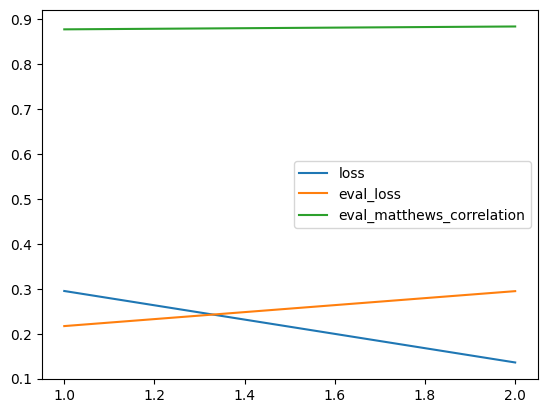

In [30]:
if isinstance(model_config.training_log_df, pd.DataFrame):
    model_config.training_log_df[["loss", "eval_loss", "eval_matthews_correlation"]].plot()
model_config.training_log_df

In [31]:
model_config.predictions

PredictionOutput(predictions=array([[-3.8574677,  4.0390797],
       [-3.634796 ,  3.9195542],
       [-3.7367313,  4.0209966],
       ...,
       [ 4.1241293, -4.5826297],
       [ 4.210207 , -4.695159 ],
       [ 4.1996202, -4.702412 ]], dtype=float32), label_ids=array([1, 1, 1, ..., 0, 0, 0], dtype=int64), metrics={'test_loss': 0.2945685088634491, 'test_accuracy': 0.9417148362235067, 'test_precision': 0.9540126239855726, 'test_recall': 0.9379432624113475, 'test_f1': 0.94590970049173, 'test_matthews_correlation': 0.8828838927752298, 'test_runtime': 23.2231, 'test_samples_per_second': 89.394, 'test_steps_per_second': 11.196})

In [32]:
model_config.evaluation_results

{'accuracy': 0.9417148362235067,
 'precision': 0.9379432624113475,
 'recall': 0.9540126239855726,
 'f1': 0.94590970049173,
 'matthews_correlation': 0.8828838927752298}

In [36]:
pd.DataFrame(model_config.confusion_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,897,51
Actual Positive,70,1058


In [34]:
model_config.evaluation_results_mv

{'accuracy': 0.9682080924855492,
 'precision': 0.973404255319149,
 'recall': 0.9682539682539683,
 'f1': 0.9708222811671088,
 'matthews_correlation': 0.9359180755812111}

In [37]:
pd.DataFrame(model_config.confusion_matrix_mv, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,152,6
Actual Positive,5,183


In [38]:
model_config.confusion_matrix.ravel()

array([ 897,   51,   70, 1058], dtype=int64)